# Reto 02:
***Dr. Antonio Arista Jalife***

En este reto deberás utilizar la conversión a escala de grises y binarización para construir una función que recorte una manzana de un fondo blanco. Para ello, deberás probar que valor de umbral recorta mejor la manzana: Un valor de umbral muy pequeño cortará mal la manzana, y un valor de umbral muy grande no cortará nada. 

Una vez obtenida la imagen binarizada que abarque toda la manzana, deberás usar el binario para que toda el área en blanco se vuelva negro, y toda el area en negro tome los pixeles de la manzana, para eso utiliza:

    patronBinario = np.where(imgBinarizada > 0, 0, 1)
    imgRecortada_rojo = np.multiply(imgOriginal[:,:,0],patronBinario)

Finalmente, une los tres canales con:

    imgRecortada = np.dstack((imgRecortada_rojo, imgRecortada_verde, imgRecortada_azul))

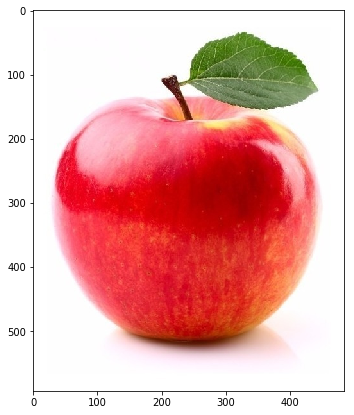

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imageOpenCV = cv2.imread("manzana.jpg", cv2.IMREAD_COLOR)
imagenManzana = cv2.cvtColor(imageOpenCV, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7,7))
plt.imshow(imagenManzana)
plt.show()

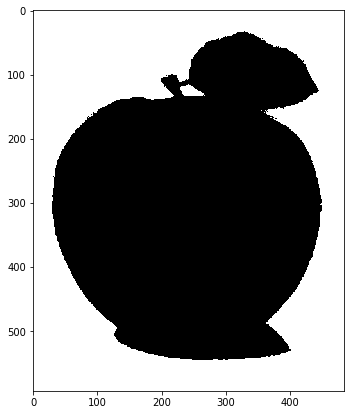

In [19]:
def convertirAGrayScale(imagen):
    imagenGris = np.sum(imagen, axis = 2) / 3    
    return imagenGris

def binarizar(imagenGris, threshold):
    imgBinaria = np.where(imagenGris > threshold, 255, 0)
    return imgBinaria

imagenManzana_gris = convertirAGrayScale(imagenManzana)
imagenManzana_bin = binarizar(imagenManzana_gris, 240)

plt.figure(figsize=(7,7))
plt.imshow(imagenManzana_bin, cmap=plt.cm.gray)
plt.show()

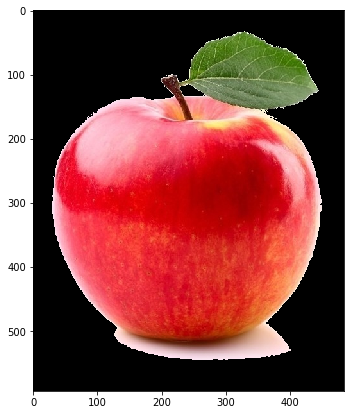

In [28]:
def recortar(imgOriginal, imgBinarizada):
    patronBinario = np.where(imgBinarizada > 0, 0, 1)
    imgRecortada_rojo = np.multiply(imgOriginal[:,:,0],patronBinario)
    imgRecortada_verde = np.multiply(imgOriginal[:,:,1],patronBinario)
    imgRecortada_azul = np.multiply(imgOriginal[:,:,2],patronBinario)
    imgRecortada = np.dstack((imgRecortada_rojo, imgRecortada_verde, imgRecortada_azul))
    return imgRecortada

manzana_recortada = recortar(imagenManzana, imagenManzana_bin)

plt.figure(figsize=(7,7))
plt.imshow(manzana_recortada)
plt.show()